**  Problem Statement  **

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
# import corresponding libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
%matplotlib inline

In [ ]:
#load boston housing data available in scipy into a dataframe bos
boston = load_boston()

In [12]:
boston.keys()

dict_keys(['data', 'feature_names', 'target', 'DESCR'])

In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

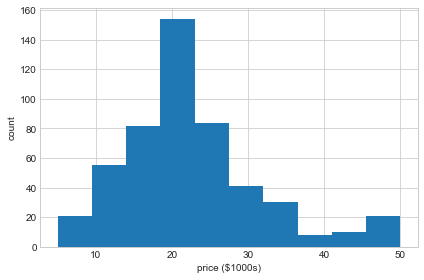

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [10]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


** Adding the target / dependent variable to the dataframe bos **

In [14]:
bos['Price'] = boston.target

** Boston Housing Data Summary Statstics  **

In [15]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


** Exploaratory Data Analysis **

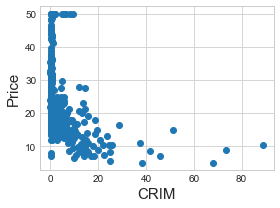

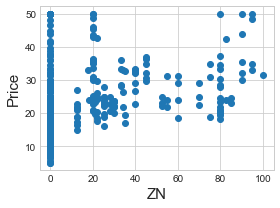

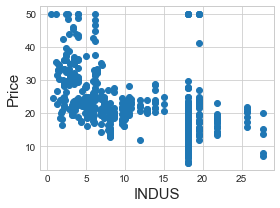

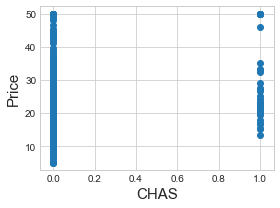

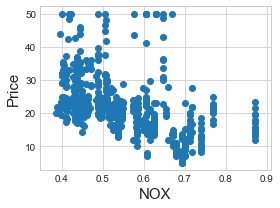

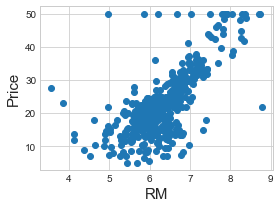

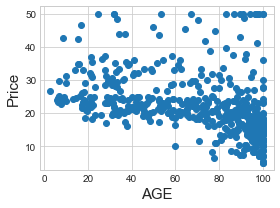

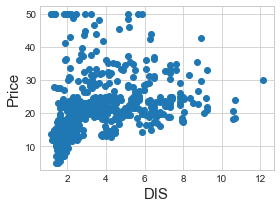

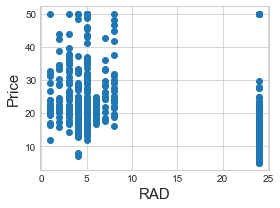

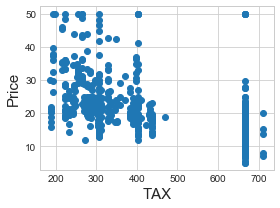

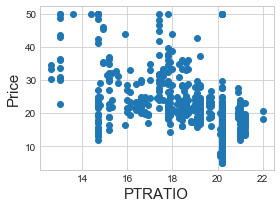

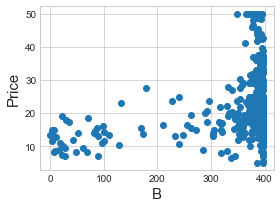

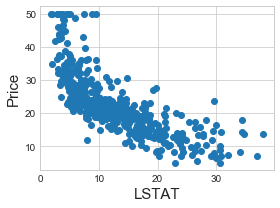

In [49]:
# Pirnt the scatter plot for each feature with respect to price
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

** Split train-test dataset **

Split the dataset into two: target value and predictor values. 
    
Let’s call the target value Y and predictor values X.

Thus,

Y = Boston Housing Price
X = All other features

In [16]:
X = bos.drop('Price',axis=1)
Y = bos.Price
print("X Shape : ",X.shape)
print("Y Shape : ",Y.shape)

X Shape :  (506, 13)
Y Shape :  (506,)


In [20]:
from sklearn.model_selection import train_test_split
#spliting 66.66% for train data and 33.33% for test data.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (339, 13)
X_test Shape :  (167, 13)
Y_train Shape :  (339,)
Y_test.shape :  (167,)


** Applying Linear Regression Model **

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)# train the model
Y_pred = lm.predict(X_test) # predict the prices based on the test data

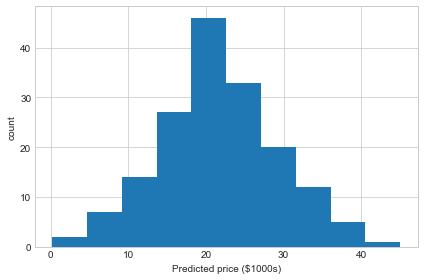

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.hist(Y_pred)
plt.xlabel('Predicted price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

In [33]:
# print coefficients (Slope) beta0
print(boston.feature_names,"\n", lm.intercept_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 40.88297292518298


In [32]:
# print coefficients (Slope) beta1
print(boston.feature_names,"\n", lm.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 
 [-1.17788072e-01  4.75879109e-02  3.65663839e-03  2.51907388e+00
 -1.66382902e+01  3.65510558e+00 -1.12696330e-02 -1.58798192e+00
  2.51678785e-01 -1.08579935e-02 -1.04937239e+00  6.32451739e-03
 -5.21213815e-01]


** How do we interpret the coefficients? **

Holding all other variables fixed, considering an area where there is more crime rate (CRIM) the predicted price of the 
house decrease by 1177.88 $.

Being an urban area with good pupil-teacher ratio by town is associated with an average increase in price of houses by 6324.51 $

Text(0.5,1,'Prices vs Predicted prices')

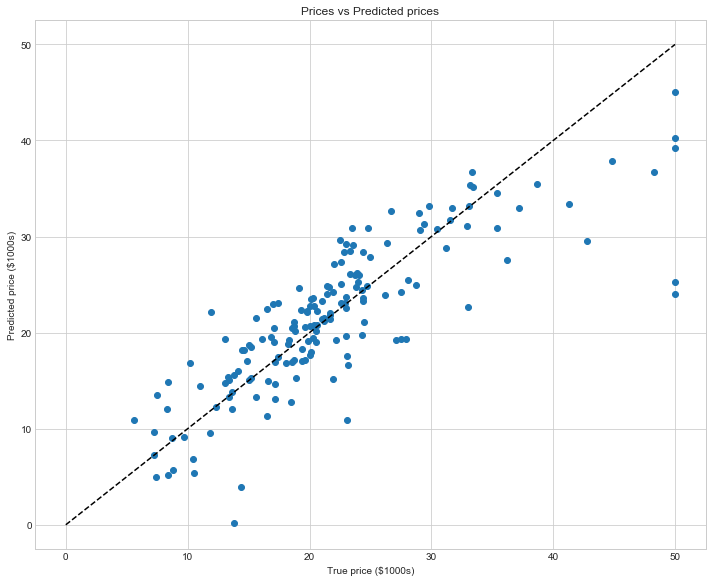

In [37]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.title("Prices vs Predicted prices")



** Error Rate of the Model - Root Mean square error  **

In [51]:
from sklearn.metrics import mean_squared_error
print("Error Rate of the Regression Model : ",mean_squared_error(Y_pred,Y_test))

Error Rate of the Regression Model :  26.551004782160774
